In [1]:
import praw
import pandas as pd
import seaborn as sns

In [2]:

# Initialize Reddit instance
reddit = praw.Reddit(
    client_id="A0shhVWnD2ixWSByzgYcMQ",         # your client id
    client_secret="AO3QK1PWMSnQ_JtGOafBueN7a9QZxQ", # your client secret
    user_agent="nlp-test"                     # your user agent
)

# Get subreddit information
subreddit = reddit.subreddit("bangladesh")

# Get the top 100 posts from the subreddit
top_posts = subreddit.top()

# Create a list to store comment data
comments_data = []

# Loop through the top posts and collect comment data
for post in top_posts:
    # Fetch comments for the post
    post.comments.replace_more(limit=None)
    for comment in post.comments.list():
        comment_data = {
            "Comment Text": comment.body,
            "Comment Score": comment.score,
            "Parent Comment ID": comment.parent_id,
            "Comment Depth": comment.depth,
            "Created Timestamp": comment.created_utc
        }
        comments_data.append(comment_data)

# Create a DataFrame from the collected comment data
comments_df = pd.DataFrame(comments_data)

# Display the comments DataFrame
print(comments_df)


                                           Comment Text  Comment Score  \
0     For anyone trying to report this on Facebook: ...            480   
1     I would also suggest those that live overseas,...            206   
2     There's an app called FireChat that will allow...            807   
3     Please use this thread if you know of any way ...            131   
4     Gilded to help boost OP's post.\n\nI highly re...            396   
...                                                 ...            ...   
5785  XD as a non-Dhakaiyan I can assure you, I don'...              2   
5786  I used to hear handling mara in school but now...              2   
5787                                           Yes bro.              2   
5788  LOL I was kidding man. I wanted my post to loo...              1   
5789                                        I feel dumb              2   

     Parent Comment ID  Comment Depth  Created Timestamp  
0            t3_94rfy3              0       1.533474

In [3]:
comments_df

,Comment Text,Comment Score,Parent Comment ID,Comment Depth,Created Timestamp
0,For anyone trying to report this on Facebook: ...,480,t3_94rfy3,0,1.533474e+09
1,"I would also suggest those that live overseas,...",206,t3_94rfy3,0,1.533476e+09
2,There's an app called FireChat that will allow...,807,t3_94rfy3,0,1.533475e+09
3,Please use this thread if you know of any way ...,131,t3_94rfy3,0,1.533473e+09
4,Gilded to help boost OP's post.\n\nI highly re...,396,t3_94rfy3,0,1.533474e+09
...,...,...,...,...,...
5785,"XD as a non-Dhakaiyan I can assure you, I don'...",2,t1_gp9o7xt,2,1.614577e+09
5786,I used to hear handling mara in school but now...,2,t1_gpab7w7,2,1.614610e+09
5787,Yes bro.,2,t1_gpa5rvu,2,1.614593e+09
5788,LOL I was kidding man. I wanted my post to loo...,1,t1_gpdnv2f,3,1.614676e+09


In [5]:
dfc= pd.read_csv("reddit_majority_label.csv")
dfc

,Comments,majority_label
0,For anyone trying to report this on Facebook: ...,-1
1,"I would also suggest those that live overseas,...",0
2,There's an app called FireChat that will allow...,0
3,Please use this thread if you know of any way ...,0
4,Gilded to help boost OP's post.\n\nI highly re...,1
...,...,...
5785,"XD as a non-Dhakaiyan I can assure you, I don'...",0
5786,I used to hear handling mara in school but now...,0
5787,Yes bro.,0
5788,LOL I was kidding man. I wanted my post to loo...,0


In [6]:
comments_df["Sentiment"]=dfc["majority_label"]

In [7]:
comments_df

,Comment Text,Comment Score,Parent Comment ID,Comment Depth,Created Timestamp,Sentiment
0,For anyone trying to report this on Facebook: ...,480,t3_94rfy3,0,1.533474e+09,-1
1,"I would also suggest those that live overseas,...",206,t3_94rfy3,0,1.533476e+09,0
2,There's an app called FireChat that will allow...,807,t3_94rfy3,0,1.533475e+09,0
3,Please use this thread if you know of any way ...,131,t3_94rfy3,0,1.533473e+09,0
4,Gilded to help boost OP's post.\n\nI highly re...,396,t3_94rfy3,0,1.533474e+09,1
...,...,...,...,...,...,...
5785,"XD as a non-Dhakaiyan I can assure you, I don'...",2,t1_gp9o7xt,2,1.614577e+09,0
5786,I used to hear handling mara in school but now...,2,t1_gpab7w7,2,1.614610e+09,0
5787,Yes bro.,2,t1_gpa5rvu,2,1.614593e+09,0
5788,LOL I was kidding man. I wanted my post to loo...,1,t1_gpdnv2f,3,1.614676e+09,0


In [8]:
print(comments_df.head())
print(comments_df.info())
print(comments_df.describe())


                                        Comment Text  Comment Score  \
0  For anyone trying to report this on Facebook: ...            480   
1  I would also suggest those that live overseas,...            206   
2  There's an app called FireChat that will allow...            807   
3  Please use this thread if you know of any way ...            131   
4  Gilded to help boost OP's post.\n\nI highly re...            396   

  Parent Comment ID  Comment Depth  Created Timestamp  Sentiment  
0         t3_94rfy3              0       1.533474e+09         -1  
1         t3_94rfy3              0       1.533476e+09          0  
2         t3_94rfy3              0       1.533475e+09          0  
3         t3_94rfy3              0       1.533473e+09          0  
4         t3_94rfy3              0       1.533474e+09          1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5790 entries, 0 to 5789
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------      

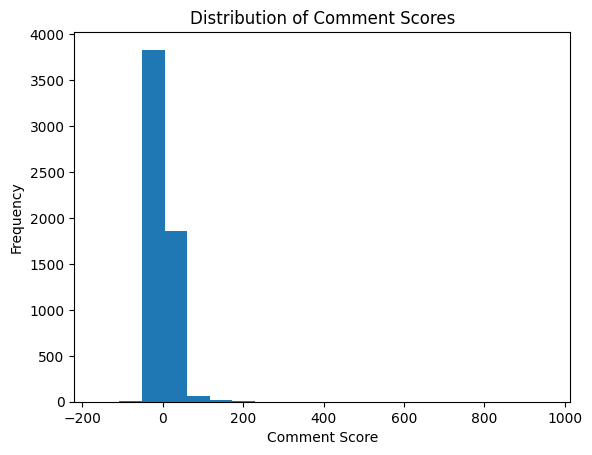

In [9]:
import matplotlib.pyplot as plt

plt.hist(comments_df["Comment Score"], bins=20)
plt.xlabel("Comment Score")
plt.ylabel("Frequency")
plt.title("Distribution of Comment Scores")
plt.show()


## Distribution of Comment Scores

This is a histogram of the distribution of comment scores. The vast majority of comments have a score of 0, with a long tail of comments with higher scores. The distribution is highly skewed to the right. This is expected, as most comments are not very interesting, but a few are very interesting and get a lot of upvotes.

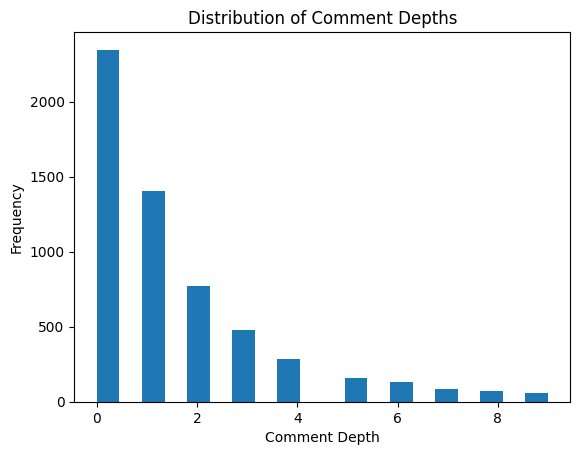

In [10]:
plt.hist(comments_df["Comment Depth"], bins=20)
plt.xlabel("Comment Depth")
plt.ylabel("Frequency")
plt.title("Distribution of Comment Depths")
plt.show()


## Distribution of Comment Depths

This is a histogram of the distribution of comment depths. The vast majority of comments are at depth 0, with a long tail of comments with higher depths. The distribution is highly skewed to the right. This is expected, as most comments are not replies to other comments, but a few are replies to replies. Very few comments have replies beyond 6.

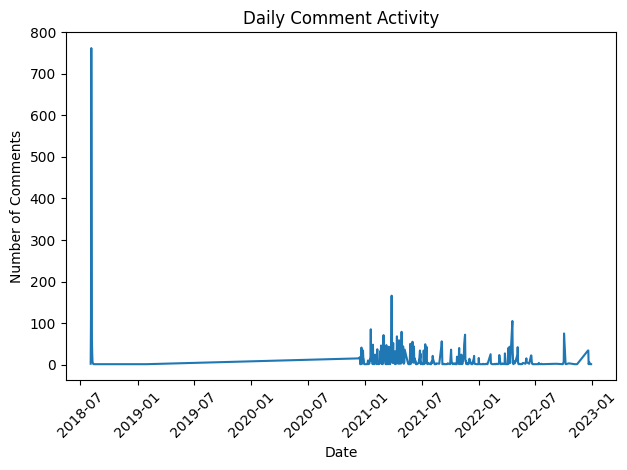

In [11]:
comments_df["Created Timestamp"] = pd.to_datetime(comments_df["Created Timestamp"], unit="s")
comments_df["Date"] = comments_df["Created Timestamp"].dt.date

daily_comment_counts = comments_df.groupby("Date").size()

plt.plot(daily_comment_counts.index, daily_comment_counts.values)
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.title("Daily Comment Activity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Daily Comment Activity

This is a histogram of the number of comments per day. The vast majority of days have less than 100 comments. This is expected, as most days have less activity, but a few days have a lot of activity. The data before 2021, is sparse hense the large number of days with very few comments.

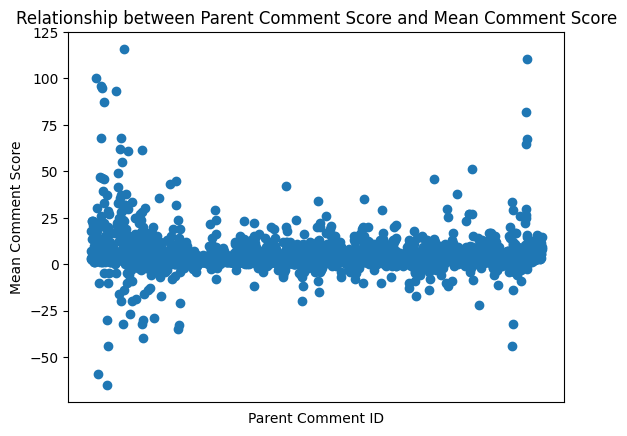

In [12]:
parent_comment_scores = comments_df.groupby("Parent Comment ID")["Comment Score"].mean()

plt.scatter(parent_comment_scores.index, parent_comment_scores.values)
plt.xlabel("Parent Comment ID")
plt.ylabel("Mean Comment Score")
plt.title("Relationship between Parent Comment Score and Mean Comment Score")
plt.xticks([])
plt.show()


## Relationsip between Parent Comment Score and Mean Comment Score

This is a scatter plot of the relationship between the parent comment score and the mean comment score. The mean of the mean comment score is around zero as for some comments with upvotes, there are almost similar number of comments with downvotes. But the deviation from 0 is high with comments going from 100 to -75 at extremes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5790 entries, 0 to 5789
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Comment Text       5790 non-null   object        
 1   Comment Score      5790 non-null   int64         
 2   Parent Comment ID  5790 non-null   object        
 3   Comment Depth      5790 non-null   int64         
 4   Created Timestamp  5790 non-null   datetime64[ns]
 5   Sentiment          5790 non-null   int64         
 6   Date               5790 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 316.8+ KB
None
                                        Comment Text  Comment Score  \
0  For anyone trying to report this on Facebook: ...            480   
1  I would also suggest those that live overseas,...            206   
2  There's an app called FireChat that will allow...            807   
3  Please use this thread if you know o

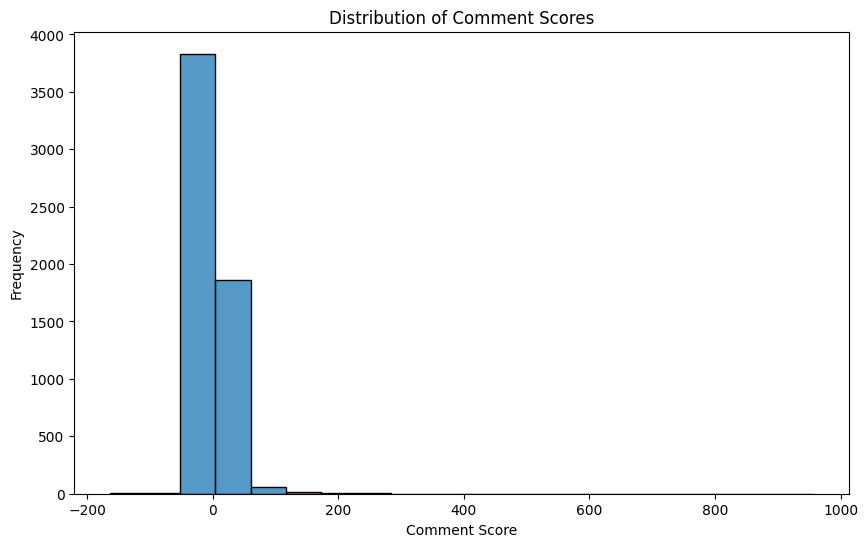

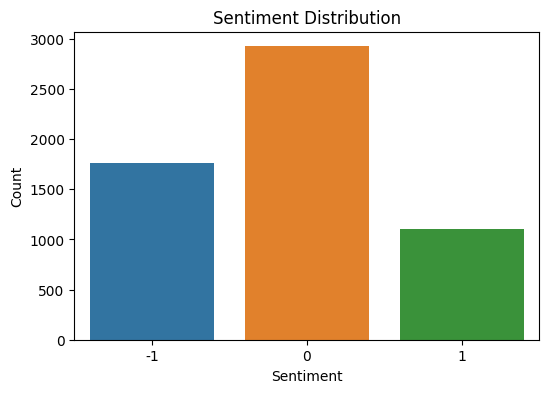

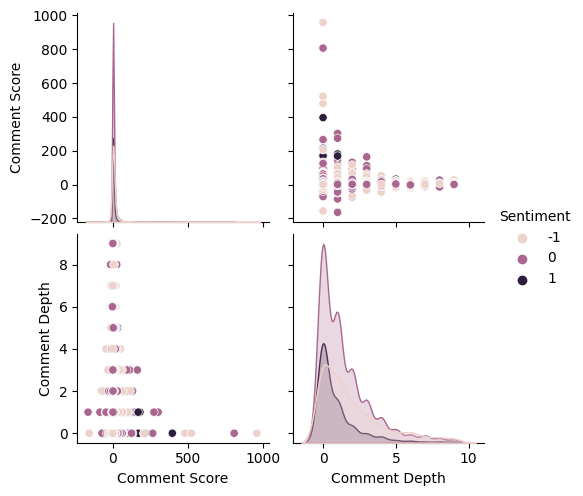

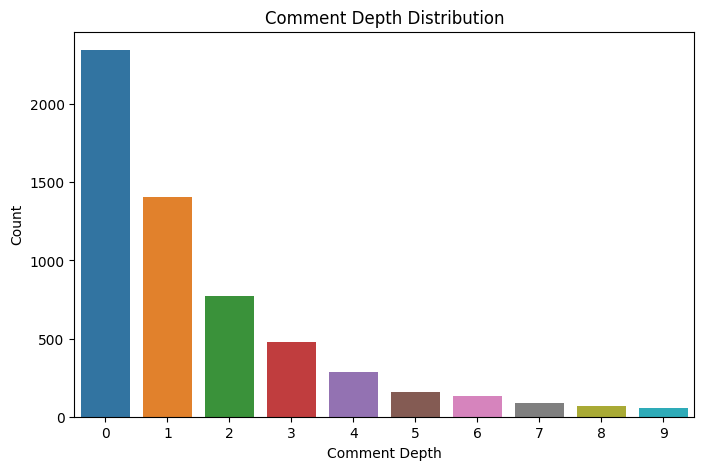

In [13]:
comments_df["Created Timestamp"] = pd.to_datetime(comments_df["Created Timestamp"])
comments_df["Date"] = pd.to_datetime(comments_df["Created Timestamp"])

# Display basic information about the DataFrame
print(comments_df.info())
print(comments_df.head())

# Summary statistics of numerical columns
print(comments_df.describe())

# Distribution of comment scores
plt.figure(figsize=(10, 6))
sns.histplot(data=comments_df, x="Comment Score", bins=20)
plt.title("Distribution of Comment Scores")
plt.xlabel("Comment Score")
plt.ylabel("Frequency")
plt.show()

# Sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=comments_df, x="Sentiment")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Explore relationships between variables
sns.pairplot(data=comments_df, hue="Sentiment")
plt.show()

# Comment depth distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=comments_df, x="Comment Depth")
plt.title("Comment Depth Distribution")
plt.xlabel("Comment Depth")
plt.ylabel("Count")
plt.show()

## Sentiment Distribution

This is a histogram of the distribution of sentiment scores. 0 is for neutral, -1 for negative and +1 for positive. The majority of scores are neutral followed by negative and then positive. Thus the overall sentiment seems to be slighty negative.

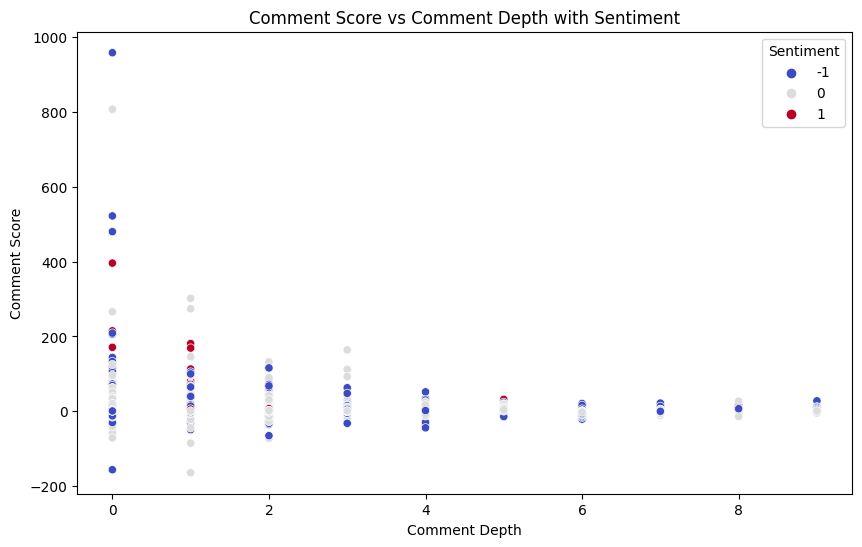

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=comments_df, x="Comment Depth", y="Comment Score", hue="Sentiment", palette="coolwarm")
plt.title("Comment Score vs Comment Depth with Sentiment")
plt.xlabel("Comment Depth")
plt.ylabel("Comment Score")
plt.legend(title="Sentiment")
plt.show()

## Comment Score vs Comment Depth with Sentiment

This is a scatter plot of the relationship between the comment score and the comment depth. The color of the points is determined by the sentiment of the comment. The sentiment is a number between -1 and 1, with -1 being negative and 1 being positive. Here we can infer that the sentiment of comments is not dependent on the comment depth, while the comment score is dependent on the comment depth. The sentiment of comments is mostly neutral, with a few negative and positive comments. The comment score is mostly 0, with a few comments with higher scores, and as we go deeper into the comment tree, the comment score tends to be lower (towards zero). This might be because people are less likely to go deeper to read and upvote comments. Also, postive and negative comments are equally likely to do into deeper replies, but a small skew towards negative comments.

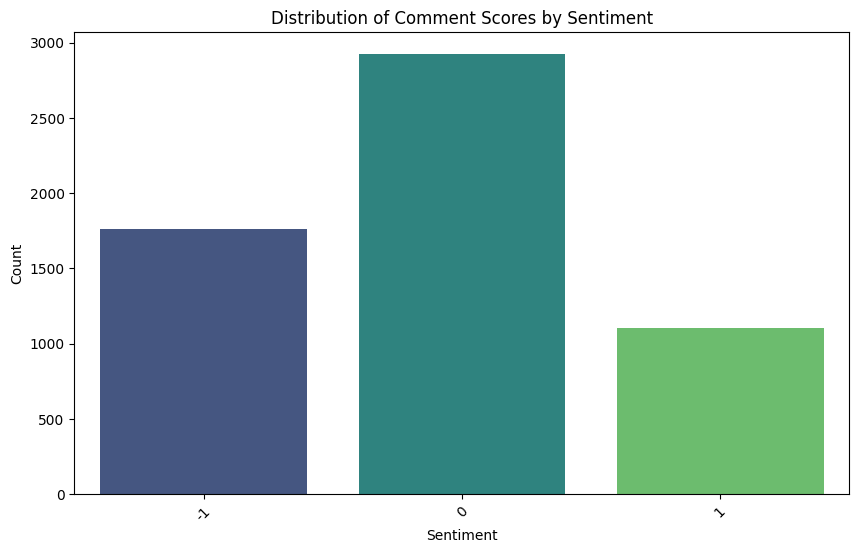

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=comments_df, x="Sentiment", palette="viridis")
plt.title("Distribution of Comment Scores by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Distribution of Comment Scores by Sentiment

This histogram is of the Comment Score vs Sentiment. We have higher score for neutral comments then negative, then positive, but this is not conclusive as this is also the distribution of the comment score (neutral has higher comments and higher comment score).

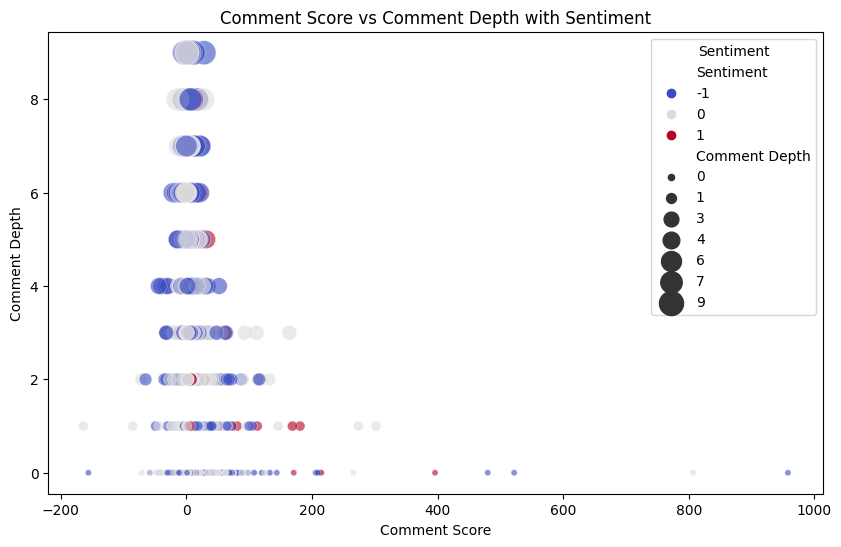

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=comments_df, x="Comment Score", y="Comment Depth", hue="Sentiment", palette="coolwarm", alpha=0.6, size="Comment Depth", sizes=(20, 300))
plt.title("Comment Score vs Comment Depth with Sentiment")
plt.xlabel("Comment Score")
plt.ylabel("Comment Depth")
plt.legend(title="Sentiment")
plt.show()

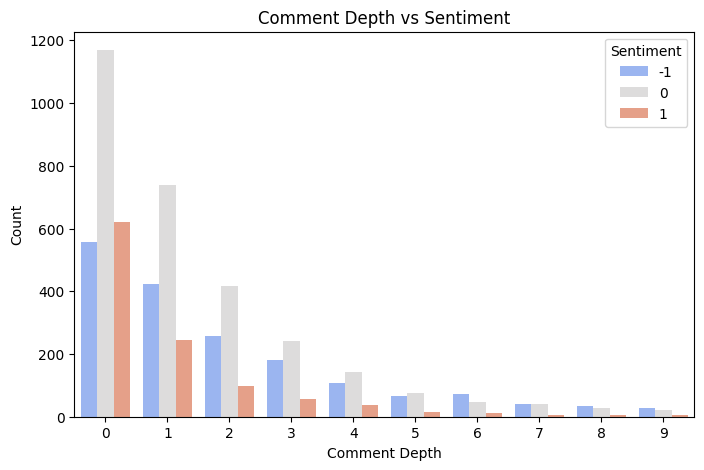

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(data=comments_df, x="Comment Depth", hue="Sentiment", palette="coolwarm")
plt.title("Comment Depth vs Sentiment")
plt.xlabel("Comment Depth")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.show()

## Distribution of count and comment depth

This is a histogram showing the relationship between count and comment depth. As we can see that the comments with lower depth have a higher comment count in general.

Another thing that we can notice is that the percentage of negative comments increases and the percentage of neutral and comments decrease at a given comment depth as the comment depth increases. This might be because people are more likely to give a reply or upvote as the comment depth increases when the comment is negative rather than when it is positive or negative.

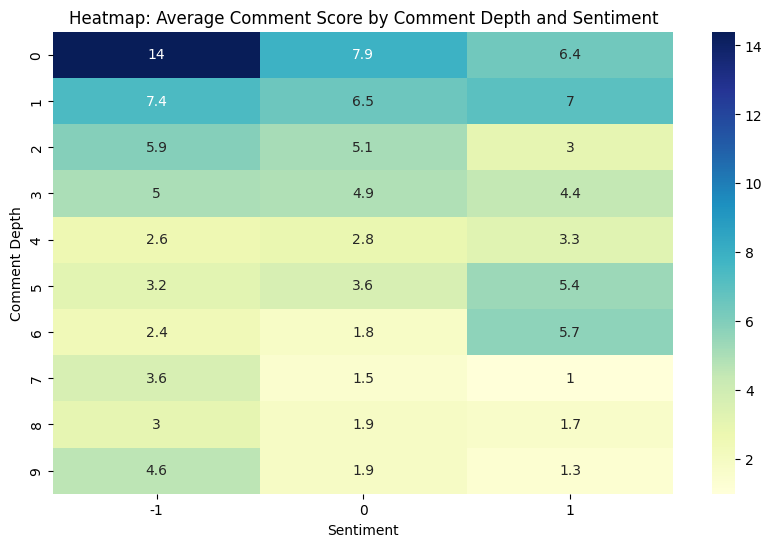

In [18]:
pivot_table = comments_df.pivot_table(index="Comment Depth", columns="Sentiment", values="Comment Score", aggfunc="mean")

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_table, annot=True, cmap="YlGnBu")
plt.title("Heatmap: Average Comment Score by Comment Depth and Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Comment Depth")
plt.show()

## Heatmap: Average Comment Score by Comment Depth and Sentiment

Here, we can clearly see that people tend to upvote negative more than postive and neutral comments as they often invoke strong reactions. One obvious trend being that the deeper the comment the lesser its score. This is expected as the deeper the comment the less likely it is to be seen by people.

In [19]:
comments_df

,Comment Text,Comment Score,Parent Comment ID,Comment Depth,Created Timestamp,Sentiment,Date
0,For anyone trying to report this on Facebook: ...,480,t3_94rfy3,0,2018-08-05 13:00:41,-1,2018-08-05 13:00:41
1,"I would also suggest those that live overseas,...",206,t3_94rfy3,0,2018-08-05 13:29:52,0,2018-08-05 13:29:52
2,There's an app called FireChat that will allow...,807,t3_94rfy3,0,2018-08-05 13:12:09,0,2018-08-05 13:12:09
3,Please use this thread if you know of any way ...,131,t3_94rfy3,0,2018-08-05 12:46:23,0,2018-08-05 12:46:23
4,Gilded to help boost OP's post.\n\nI highly re...,396,t3_94rfy3,0,2018-08-05 12:55:27,1,2018-08-05 12:55:27
...,...,...,...,...,...,...,...
5785,"XD as a non-Dhakaiyan I can assure you, I don'...",2,t1_gp9o7xt,2,2021-03-01 05:37:13,0,2021-03-01 05:37:13
5786,I used to hear handling mara in school but now...,2,t1_gpab7w7,2,2021-03-01 14:38:47,0,2021-03-01 14:38:47
5787,Yes bro.,2,t1_gpa5rvu,2,2021-03-01 10:08:27,0,2021-03-01 10:08:27
5788,LOL I was kidding man. I wanted my post to loo...,1,t1_gpdnv2f,3,2021-03-02 09:01:44,0,2021-03-02 09:01:44
